<a href="https://colab.research.google.com/github/argira/colab/blob/main/ICE_reported_sexual_abuses_reported_in_detention_facilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pablo Manriquez request to analyze this data for a probable story - abuses reported 2014 - present

In [ ]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
#from pingouin import pairwise_ttests #this is for performing the pairwise tests
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

In [ ]:
import pandas as pd
df1 = pd.read_excel('https://cdn.muckrock.com/foia_files/2019/09/18/2018-ICFO-34470_Highlighted.xls')

In [ ]:
df1.head()

,Case #,Group,Case Type,Class Code,CaseIs,Status,Incident Date,Reported Date,Detention Facility,Incident City,Incident State,Subject Type,Case Summary,Topic,Synopsis,Primary FD,Secondary FD1,Secondary FD2
0,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Information Recorded,Closed,Closed,17-MAR-14,24-MAR-14,PORT ISABEL - TX - SPC,LOS FRESNOS,"CAMERON, TX",ICE Detainee,ERO Allegation of detainee sexual misconduct. ...,Allegation of detainee sexual misconduct.,"On March 20, 2014, the Joint Intake Center (JI...",0604 Detainee/Alien - Consensual Sexual Conduc...,NaN,NaN
1,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Information Recorded,Closed,Closed,17-MAR-14,24-MAR-14,PORT ISABEL - TX - SPC,LOS FRESNOS,"CAMERON, TX",ICE Detainee,ERO Allegation of detainee sexual misconduct. ...,Allegation of detainee sexual misconduct.,"On March 20, 2014, the Joint Intake Center (JI...",0604 Detainee/Alien - Consensual Sexual Conduc...,NaN,NaN
2,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Information Recorded,Closed,Closed,17-MAR-14,24-MAR-14,PORT ISABEL - TX - SPC,LOS FRESNOS,"CAMERON, TX",ICE Detainee,ERO Allegation of detainee sexual misconduct. ...,Allegation of detainee sexual misconduct.,"On March 20, 2014, the Joint Intake Center (JI...",0604 Detainee/Alien - Consensual Sexual Conduc...,NaN,NaN
3,(b)(7)(E),OPR JIC Closed Files,Information Only,Non-Criminal Misconduct,Closed,Closed,01-MAR-14,29-APR-14,ADELANTO CORRECTIONAL FACILITY - CA - IGSA,ADELANTO,"SAN BERNARDINO, CA",ICE Detainee,ERO Allegation of detainee on detainee sexual ...,Allegation of detainee sexual assault.,"On April 29, 2014, the Joint Intake Center (JI...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
4,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Non-Criminal Misconduct,Closed,Closed,06-MAY-14,08-MAY-14,ELOY FEDERAL CONTRACT FACILITY - AZ - IGSA,ELOY,"PINAL, AZ",ICE Detainee (ICE facility),"ERO Detainee alleges sexual harassment. Eloy, AZ",Detainee alleges sexual harassment.,"On May 7, 2014, the Joint Intake Center (JIC) ...",0599 Detainee/Alien - Sexual Harassment (Detai...,NaN,NaN


In [ ]:
df1.describe()

,Case #,Group,Case Type,Class Code,CaseIs,Status,Incident Date,Reported Date,Detention Facility,Incident City,Incident State,Subject Type,Case Summary,Topic,Synopsis,Primary FD,Secondary FD1,Secondary FD2
count,1248,1248,1248,1246,1248,1248,1248,1248,1234,1248,1248,1248,1248,1245,1245,1248,43,3
unique,1,38,6,6,1,1,802,772,146,146,134,13,1197,986,1222,16,18,2
top,(b)(7)(E),ICE Enforcement & Removal Operations,Investigation ICE OPR,Criminal,Closed,Closed,03-MAR-15,14-JUN-16,ELOY FEDERAL CONTRACT FACILITY - AZ - IGSA,ELOY,"PINAL, AZ",ICE Detainee,ERO Allegation of detainee sexual assault. Tac...,The JIC received an allegation that a detainee...,"On March 3, 2015, the Joint Intake Center (JIC...",0610 Detainee/Alien - Sexual Assault (Detainee...,0610 Detainee/Alien - Sexual Assault (Detainee...,0599 Detainee/Alien - Sexual Harassment (Detai...
freq,1248,568,658,798,1248,1248,6,6,88,87,139,516,4,43,4,705,10,2


In [ ]:
df1.isnull().sum()

Case #                   0
Group                    0
Case Type                0
Class Code               2
CaseIs                   0
Status                   0
Incident Date            0
Reported Date            0
Detention Facility      14
Incident City            0
Incident State           0
Subject Type             0
Case Summary             0
Topic                    3
Synopsis                 3
Primary FD               0
Secondary FD1         1205
Secondary FD2         1245
dtype: int64

In [ ]:
df1.Group.unique()

array(['ICE Enforcement & Removal Operations', 'OPR JIC Closed Files',
       'EIRU', 'ICE OPR RAC Tucson-1', 'ICE OPR RAC San Antonio-2',
       'ICE OPR SAC CENTRAL - CLOSED CASES', 'ICE OPR RAC Phoenix',
       'ICE OPR Associate SAC - Chicago', 'ICE OPR RAC Harlingen 1',
       'ICE OPR RAC Tucson', 'ICE OPR RAC Jersey City-1',
       'ICE OPR RAC San Diego-1', 'ICE OPR RAC San Diego-2',
       'ICE OPR RAC San Antonio-1', 'ICE OPR RAC Calexico',
       'ICE OPR RAC Miami-1', 'ICE OPR RAC Jersey City-2',
       'ICE OPR RAC Tucson-2', 'ICE OPR RAC Buffalo',
       'ICE OPR RAC Fairfax', 'ICE OPR RAC Seattle',
       'ICE OPR RAC Chicago-2', 'ICE OPR RAC Tampa',
       'ICE OPR RAC Los Angeles-1', 'ICE OPR RAC Miami-2',
       'ICE OPR RAC Chicago-1', 'ICE OPR RAC Los Angeles-2',
       'ICE OPR RAC San Francisco', 'ICE OPR RAC Portsmouth',
       'ICE OPR New Orleans', 'ICE OPR RAC Harlingen 2',
       'ICE OPR RAC Atlanta', 'ICE OPR Associate SAC - Tucson',
       'ICE OPR RAC Den

The ICE Office of Professional Responsibility (OPR) is responsible for upholding the agency’s professional standards through a multi-disciplinary approach of security, inspections and investigations. OPR operates out of a headquarters office and three field offices across the nation. Retrieved from https://www.ice.gov/contact/field-offices?office=16

Jersey City - OPR
Phoenix - OPR
San Antonio - OPR
Washington, DC - OPR

U.S. Immigration and Customs Enforcement's (ICE) Enforcement Removal Operations (ERO) is committed to a transparent process and to resolving your concerns at the earliest opportunity available. For this reason, concerns or questions regarding ERO practices, policies and/or programs should first be directed to the local field liaison.
Locate the appropriate field office from the list of 24 field liaisons.

Atlanta - ERO
Baltimore - ERO
Buffalo - ERO
Burlington - ERO
Centennial - ERO
Chicago - ERO
Dallas - ERO
Detroit - ERO
El Paso - ERO
Fairfax - ERO
Fort Snelling - ERO
Houston - ERO
Los Angeles - ERO
New Orleans - ERO
New York - ERO
Newark - ERO
Philadelphia - ERO
Phoenix - ERO
Plantation - ERO
San Antonio - ERO
San Diego - ERO
San Francisco - ERO
Seattle - ERO
West Valley City - ERO

RAC - Resident Agent in Charge

HSI(Homeland Security Investigations) has 30 Special Agent in Charge (SAC) offices throughout the United States.

The SAC offices are responsible for the administration and management of all investigative and enforcement activities within the geographic boundaries of the office.


In [ ]:
df1['Class Code'].unique()

array(['Information Recorded', 'Non-Criminal Misconduct', 'Criminal',
       'Non-Criminal (S)', 'Criminal Non Federal', nan,
       'Performance-Non Misconduct'], dtype=object)

In [ ]:
#Let's see if we can infer the class code nan with another value, like case type or primary/secondary fd
df1[df1['Class Code'].isnull()]

,Case #,Group,Case Type,Class Code,CaseIs,Status,Incident Date,Reported Date,Detention Facility,Incident City,Incident State,Subject Type,Case Summary,Topic,Synopsis,Primary FD,Secondary FD1,Secondary FD2
16,(b)(7)(E),ICE OPR SAC CENTRAL - CLOSED CASES,Information Only,NaN,Closed,Closed,01-APR-15,01-APR-15,EL PASO SERVICE PROCESSING CENTER - TX - SPC,EL PASO,"EL PASO, TX",ICE D&R Contract Detention Officer,Alleged inappropriate pat down by Doyon Officer,Alleged inappropriate patdown by Doyon Officer,"On March 31, 2015, the Office of Professional ...",0650 Detainee - Sexual Assault-Staff on Detainee,NaN,NaN
169,(b)(7)(E),ICE OPR RAC Los Angeles-1,Investigation ICE OPR,NaN,Closed,Closed,09-MAY-14,16-MAY-14,NaN,LOS ANGELES,"LOS ANGELES, CA",ICE D&R Contract Detention Officer,Inappropriately Touched a Detainee's Genital A...,ERO Detainee alleges an officer sexually assau...,"On May 15, 2014, the Joint Intake Center (JIC)...",0603 Detainee/Alien - Abuse (Sexual Abuse),NaN,NaN


In [ ]:
#look at the information only case type to determine we can use the information recorded class code
df1[df1['Primary FD']=='0650 Detainee - Sexual Assault-Staff on Detainee']
#Based on the subject type similarity with other pat down behavior which are identified as Non-Criminal Misconduct, the nan value, will be set to the same class code


,Case #,Group,Case Type,Class Code,CaseIs,Status,Incident Date,Reported Date,Detention Facility,Incident City,Incident State,Subject Type,Case Summary,Topic,Synopsis,Primary FD,Secondary FD1,Secondary FD2
16,(b)(7)(E),ICE OPR SAC CENTRAL - CLOSED CASES,Information Only,NaN,Closed,Closed,01-APR-15,01-APR-15,EL PASO SERVICE PROCESSING CENTER - TX - SPC,EL PASO,"EL PASO, TX",ICE D&R Contract Detention Officer,Alleged inappropriate pat down by Doyon Officer,Alleged inappropriate patdown by Doyon Officer,"On March 31, 2015, the Office of Professional ...",0650 Detainee - Sexual Assault-Staff on Detainee,NaN,NaN
156,(b)(7)(E),ICE OPR RAC Seattle,Investigation ICE OPR,Criminal,Closed,Closed,18-MAR-14,21-MAR-14,JOSEPHINE COUNTY JAIL - OR - IGSA,GRANTS PASS,"JOSEPHINE, OR",ICE D&R Contract Detention Officer,A Deputy Sheriff allegedly had abusive sexual ...,ICE detention contractor alleged inapproriate ...,"On March 19, 2014, the Joint Intake Center (JI...",0650 Detainee - Sexual Assault-Staff on Detainee,0712 Other Criminal,NaN
310,(b)(7)(E),ICE OPR RAC Tucson-2,Investigation ICE OPR,Criminal,Closed,Closed,21-APR-15,22-APR-15,ELOY FEDERAL CONTRACT FACILITY - AZ - IGSA,ELOY,"PINAL, AZ",ICE Contractors and Employees,ICE detainee claims he heard female detainees ...,Inmate allleges contract officers are sexually...,"On April 22, 2015, Office of Professional Resp...",0650 Detainee - Sexual Assault-Staff on Detainee,NaN,NaN
347,(b)(7)(E),ICE OPR SAC CENTRAL - CLOSED CASES,Investigation ICE OPR,Non-Criminal Misconduct,Closed,Closed,16-JUN-15,16-JUN-15,ROLLING PLAINS DETENTION CENTER - TX - IGSA,HASKELL,"HASKELL, TX",ICE - Contractor,ICE contract officer grabbed several female de...,PREA allegation on unnamed staff on unnamed de...,"On June 22, 2015, the Joint Intake Center (JIC...",0650 Detainee - Sexual Assault-Staff on Detainee,NaN,NaN
368,(b)(7)(E),ICE OPR SAC CENTRAL - CLOSED CASES,Investigation ICE OPR,Criminal,Closed,Closed,22-JUL-15,30-JUL-15,WEST TEXAS DETENTION FACILITY - TX - IGSA,SIERRA BLANCA,"HUDSPETH, TX",ICE D&R Contract Detention Officer,RIG: ERO: Allegation of staff on detainee sexu...,Sexual assault staff on detainee.,"On July 30, 2015, the Joint Intake Center (JIC...",0650 Detainee - Sexual Assault-Staff on Detainee,NaN,NaN
426,(b)(7)(E),ICE OPR RAC San Diego-1,Investigation ICE OPR,Non-Criminal Misconduct,Closed,Closed,13-NOV-15,13-NOV-15,OTAY MESA DETENTION CENTER - CA - IGSA,SAN DIEGO,"SAN DIEGO, CA",ICE - Contractor,ICE detainee claims a sexual relationship with...,ICE Detainee Claims Sexual Relationship with T...,"On November 13, 2015, Office of Professional R...",0650 Detainee - Sexual Assault-Staff on Detainee,NaN,NaN
528,(b)(7)(E),ICE OPR Associate SAC - Tucson,Investigation ICE OPR,Criminal,Closed,Closed,06-JUN-16,06-JUN-16,TUCSON INS HOLD ROOM - AZ - OTHER,TUCSON,"PIMA, AZ",ICE Enforcement & Removal Operations (ERO) – D...,ERO/Tucson arrestee claims she was sexually as...,ERO/Tucson arrestee claims she had a cell phon...,"On June 6, 2016, the Office of Professional Re...",0650 Detainee - Sexual Assault-Staff on Detainee,NaN,NaN
542,(b)(7)(E),ICE OPR RAC Atlanta,Investigation ICE OPR,Criminal,Closed,Closed,25-JUN-16,27-JUN-16,IRWIN COUNTY DETENTION CENTER - GA - IGSA,OCILLA,"IRWIN, GA",ICE Contractors and Employees,ERO: Detainee alleges sexual contact and intim...,ERO: Detainee alleges sexual contact and intim...,"On June 27, 2016, the Joint Intake Center (JIC...",0650 Detainee - Sexual Assault-Staff on Detainee,NaN,NaN
647,(b)(7)(E),ICE OPR RAC San Antonio-2,Investigation ICE OPR,Criminal,Closed,Closed,05-DEC-16,21-DEC-16,SOUTH TEXAS DETENTION COMPLEX - TX - CDF,PEARSALL,"FRIO, TX",ICE D&R Contract Detention Officer,RIG ERO: Detainee claims GEO officer sexually ...,Detainee claims GEO officer sexually assaulted...,"On December 21, 2016, the Joint Intake Center ...",0650 Detainee - Sexual Assault-Staff on Detainee,NaN,NaN
864,(b)(7)(E),ICE Enforcement & Removal Operations,Management Inquiry,Non-Criminal (S),Closed

In [ ]:
#Could not infere a class code from the case type or the description, it seems it was a determination after the investigation was completed. Maybe with some time we can define the class as category and impute it

In [ ]:
df1[df1['Detention Facility'].isnull()]

,Case #,Group,Case Type,Class Code,CaseIs,Status,Incident Date,Reported Date,Detention Facility,Incident City,Incident State,Subject Type,Case Summary,Topic,Synopsis,Primary FD,Secondary FD1,Secondary FD2
12,(b)(7)(E),ICE OPR RAC Tucson-1,Information Only,Criminal,Closed,Closed,29-NOV-14,02-DEC-14,NaN,FLORENCE,"PINAL, AZ",ICE Detainee (ICE facility),"ERO Detainee Sexual Assault. Florence, AZ",Detainee Sexual Assault.,"On December 1, 2014, the Joint Intake Center (...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
105,(b)(7)(E),ICE OPR RAC Harlingen 1,Information Only,Criminal,Closed,Closed,07-JUL-17,14-JUL-17,NaN,BROWNSVILLE,"CAMERON, TX",ICE Contractors and Employees,ERO: Contract employee at the Port Isabel Dete...,Contract employee at the Port Isabel Detention...,"On July 14, 2017, the Joint Intake Center (JIC...",0718 Threat,0603 Detainee/Alien - Abuse (Sexual Abuse),NaN
125,(b)(7)(E),ICE OPR RAC Phoenix,Information Only,Criminal,Closed,Closed,16-MAR-18,05-APR-18,NaN,PHOENIX,"MARICOPA, AZ",ICE D&R Contract Detention Officer,ERO: RIG: UAC discloses possible PREA incident...,UAC discloses possible PREA incident that occu...,"On April 5, 2018 the Joint Intake Center (JIC)...",0612 Detainee/Alien - Sexual Assault (Staff on...,NaN,NaN
127,(b)(7)(E),ICE OPR RAC Tucson,Information Only,Criminal,Closed,Closed,20-APR-18,20-APR-18,NaN,ORACLE,"PINAL, AZ",ICE D&R Contract Detention Officer,ERO: UAC reports Sycamore Canyon employee show...,UAC reports Sycamore Canyon employee showed hi...,"On April 20, 2018, the Joint Intake Center (JI...",0600 Detainee/Alien - Sexual Harassment (Staff...,NaN,NaN
129,(b)(7)(E),ICE OPR RAC Jersey City-1,Information Only,Criminal,Closed,Closed,27-APR-18,14-MAY-18,NaN,IRVINGTON,"WESTCHESTER, NY",ICE - Civilian,ERO: RIG: Minor allegedly hit and inappropriat...,Minor allegedly hit and inappropriately touche...,"On May14, 2018, the Joint Intake Center (JIC) ...",0607 Detainee/Alien - Physical Assault (Detain...,0610 Detainee/Alien - Sexual Assault (Detainee...,NaN
169,(b)(7)(E),ICE OPR RAC Los Angeles-1,Investigation ICE OPR,NaN,Closed,Closed,09-MAY-14,16-MAY-14,NaN,LOS ANGELES,"LOS ANGELES, CA",ICE D&R Contract Detention Officer,Inappropriately Touched a Detainee's Genital A...,ERO Detainee alleges an officer sexually assau...,"On May 15, 2014, the Joint Intake Center (JIC)...",0603 Detainee/Alien - Abuse (Sexual Abuse),NaN,NaN
213,(b)(7)(E),ICE OPR RAC Miami-1,Investigation ICE OPR,Criminal,Closed,Closed,11-SEP-14,18-SEP-14,NaN,MIAMI,"MIAMI-DADE, FL",ICE Detainee (ICE facility),RIG ERO Alleged Detainee on Detainee Sexual As...,Alleged Detainee on Detainee Sexual Assault.,"On September 15, 2014, the Joint Intake Center...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
379,(b)(7)(E),ICE OPR RAC San Antonio-2,Investigation ICE OPR,Criminal,Closed,Closed,20-AUG-15,21-AUG-15,NaN,TAYLOR,"WILLIAMSON, TX",ICE Detainee,ERO: Detainee on Detainee – Sexual Assault – I...,ERO: Detainee on Detainee – Sexual Assault – I...,"On August 23, 2015, the Joint Intake Center (J...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
522,(b)(7)(E),ICE OPR SAC CENTRAL - CLOSED CASES,Investigation ICE OPR,Non-Criminal (S),Closed,Closed,19-MAY-16,19-MAY-16,NaN,CONROE,"MONTGOMERY, TX",ICE Enforcement & Removal Operations (ERO) – D...,ERO: Detainee alleges she was forced to change...,Detainee alleges she was forced to change clot...,"On May 19, 2016, the Joint Intake Center (JIC)...",0603 Detainee/Alien - Abuse (Sexual Abuse),NaN,NaN
686,(b)(7)(E),ICE OPR RAC Jersey City-1,Investigation ICE OPR,Non-Criminal Misconduct,Closed,Closed,04-MAY-17,04-MAY-17,NaN,NEW YORK -BRONX,"BRONX, NY",ICE Enforcement & Removal Operations (ERO) – D...,ERO: Inappropriately Touched a Detainee's Butt...,ICE Detainee alleged an Deporation Officer ina...,"On May 04, 2017, the Joint Intake Center (JIC)...",0612 Detainee/Alien - Sexual Assault (Staff on...,NaN,NaN


In [ ]:
df1[df1['Incident City']== 'FLORENCE']

,Case #,Group,Case Type,Class Code,CaseIs,Status,Incident Date,Reported Date,Detention Facility,Incident City,Incident State,Subject Type,Case Summary,Topic,Synopsis,Primary FD,Secondary FD1,Secondary FD2
7,(b)(7)(E),OPR JIC Closed Files,Information Only,Non-Criminal Misconduct,Closed,Closed,20-AUG-14,25-AUG-14,FLORENCE SERVICE PROCESSING CENTER - AZ - SPC,FLORENCE,"PINAL, AZ",ICE Detainee,ERO Report of a possible PREA allegation. Flor...,Report of a possible PREA allegation.,"On August 21, 2014, the Joint Intake Center (J...",0604 Detainee/Alien - Consensual Sexual Conduc...,NaN,NaN
12,(b)(7)(E),ICE OPR RAC Tucson-1,Information Only,Criminal,Closed,Closed,29-NOV-14,02-DEC-14,NaN,FLORENCE,"PINAL, AZ",ICE Detainee (ICE facility),"ERO Detainee Sexual Assault. Florence, AZ",Detainee Sexual Assault.,"On December 1, 2014, the Joint Intake Center (...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
51,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Non-Criminal Misconduct,Closed,Closed,13-AUG-15,19-APR-16,FLORENCE SERVICE PROCESSING CENTER - AZ - SPC,FLORENCE,"PINAL, AZ",ICE Contractors and Employees,RIG: ERO: Detainee alleges that he was forced ...,Detainee alleges that he was sexually harassed...,"On April 19, 2016, the Joint Intake Center (JI...",0600 Detainee/Alien - Sexual Harassment (Staff...,NaN,NaN
60,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Criminal,Closed,Closed,30-JUN-16,01-JUL-16,FLORENCE SERVICE PROCESSING CENTER - AZ - SPC,FLORENCE,"PINAL, AZ",ICE Detainee (ICE facility),ERO: Detainee claims another detainee has been...,Sexual Assault Allegation,"On July 1, 2016, the Joint Intake Center (JIC)...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
102,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Non-Criminal Misconduct,Closed,Closed,21-JUN-17,21-JUN-17,FLORENCE SERVICE PROCESSING CENTER - AZ - SPC,FLORENCE,"PINAL, AZ",ICE Detainee,ERO: ICE detainee alleged another detainee gra...,ICE detainee alleged another detainee grabbed ...,"On June 21, 2017, the Joint Intake Center (JIC...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
148,(b)(7)(E),ICE OPR RAC Tucson-2,Investigation ICE OPR,Criminal,Closed,Closed,11-FEB-14,12-FEB-14,FLORENCE SERVICE PROCESSING CENTER - AZ - SPC,FLORENCE,"PINAL, AZ",ICE Detainee (ICE facility),Detainee alleges sexual abuse by other detaine...,ERO Detainee alleges sexual abuse.,"On February 11, 2014, the Joint Intake Center ...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
163,(b)(7)(E),ICE OPR RAC Phoenix,Investigation ICE OPR,Criminal Non Federal,Closed,Closed,06-APR-14,11-APR-14,FLORENCE SERVICE PROCESSING CENTER - AZ - SPC,FLORENCE,"PINAL, AZ",ICE Detainee (ICE facility),Investigation into ERO Detainee on Detainee Se...,ERO Detainee on Detainee Sexual Misconduct.,"On April 7, 2014, the Joint Intake Center (JIC...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
175,(b)(7)(E),ICE OPR RAC Tucson-1,Investigation ICE OPR,Criminal,Closed,Closed,14-JUN-14,16-JUN-14,FLORENCE SERVICE PROCESSING CENTER - AZ - SPC,FLORENCE,"PINAL, AZ",ICE Detainee (ICE facility),ERO Detainee on Detainee Inappropriate Touchin...,ERO Detainee on Detainee Inappropriate Touching.,"On June 14, 2014, the Joint Intake Center (JIC...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
176,(b)(7)(E),ICE OPR RAC Tucson-1,Investigation ICE OPR,Criminal,Closed,Closed,14-JUN-14,16-JUN-14,FLORENCE SERVICE PROCESSING CENTER - AZ - SPC,FLORENCE,"PINAL, AZ",ICE Detainee (ICE facility),ERO Detainee on Detainee Inappropriate Touchin...,ERO Detainee on Detainee Inappropriate Touching.,"On June 14, 2014, the Joint Intake Center (JIC...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN
242,(b)(7)(E),ICE OPR RAC Tucson-1,Investigation ICE OPR,Criminal,Closed,Closed,10-DEC-14,10-DEC-14,FLORENCE SERVICE PROCESSING CENTER - AZ - SPC,FLORENCE,"PINAL, AZ",ICE Contractors and Employees,ERO Detainee allegation of physical and

THERE ARE VAIROS DETENTION CENTERS IN THE SAME CITY, SO WE CAN'T INFERE THE DETENTION CENTERS THAT ARE MISSING. WON'T REMOVE THE ROWS SINCE THEY HAVE OTHER VALUABLE DATA

In [ ]:
df1[df1['Topic'].isnull()]

,Case #,Group,Case Type,Class Code,CaseIs,Status,Incident Date,Reported Date,Detention Facility,Incident City,Incident State,Subject Type,Case Summary,Topic,Synopsis,Primary FD,Secondary FD1,Secondary FD2
788,(b)(7)(E),ICE Enforcement & Removal Operations,JIC_Log,Non-Criminal Misconduct,Closed,Closed,07-JUL-16,08-JUL-16,YORK COUNTY PRISON - PA - IGSA,YORK,"YORK, PA",ICE Contractors and Employees,JIC_LOG: Detainee alleges that he was kicked i...,NaN,NaN,0612 Detainee/Alien - Sexual Assault (Staff on...,NaN,NaN
790,(b)(7)(E),ERO Custody Management Group,JIC_Log,Criminal,Closed,Closed,22-DEC-16,22-DEC-16,NaN,KANSAS CITY,"PLATTE, MO",ICE Enforcement & Removal Operations (ERO) – D...,"ERO JIC: Motion to continue, which OCC has not...",NaN,NaN,0603 Detainee/Alien - Abuse (Sexual Abuse),NaN,NaN
791,(b)(7)(E),ICE Enforcement & Removal Operations,JIC_Log,Non-Criminal Misconduct,Closed,Closed,26-DEC-17,23-JAN-18,DENVER CONTRACT DETENTION FACILITY - CO - CDF,AURORA,"ADAMS, CO",ICE Contractors and Employees,ERO: RIG: Detainee alleges that an officer at ...,NaN,NaN,0600 Detainee/Alien - Sexual Harassment (Staff...,NaN,NaN


The same topic and synopsis columns with NAN values are the same.

In [ ]:
df1['Class Code'].unique()

array(['Information Recorded', 'Non-Criminal Misconduct', 'Criminal',
       'Non-Criminal (S)', 'Criminal Non Federal', nan,
       'Performance-Non Misconduct'], dtype=object)

In [ ]:
df1['Case Type'].unique()

array(['Information Only', 'Investigation ICE OPR', 'JIC_Log',
       'Management Inquiry', 'Management Referral', 'Unknown'],
      dtype=object)

In [ ]:
df1['Subject Type'].unique()

array(['ICE Detainee', 'ICE Detainee (ICE facility)',
       'ICE Contractors and Employees',
       'ICE D&R Contract Detention Officer',
       'ICE Detainee (non-ICE facility)', 'ICE - Contractor',
       'ICE Enforcement & Removal Operations (ERO) – Detention/Deportation Officer',
       'ICE - Civilian',
       'ICE Enforcement & Removal Operations (ERO) - Manager',
       'ICE Enforcement & Removal Operations (ERO) - Other Employee',
       'ICE Unknown', 'ICE Detention/Deportation Officer',
       'ICE-Inmate – Non-detainee'], dtype=object)

In [ ]:
df1['Primary FD'].unique()

array(['0604 Detainee/Alien - Consensual Sexual Conduct (Detainee-on-Detainee)',
       '0610 Detainee/Alien - Sexual Assault (Detainee on Detainee)',
       '0599 Detainee/Alien - Sexual Harassment (Detainee-on-Detainee)',
       '0600 Detainee/Alien - Sexual Harassment (Staff-on-Detainee)',
       '0612 Detainee/Alien - Sexual Assault (Staff on Detainee)',
       '0650 Detainee - Sexual Assault-Staff on Detainee',
       '0603 Detainee/Alien - Abuse (Sexual Abuse)',
       '0647 Detainee - Searches of Detainees', '0718 Threat',
       '0640 Detainee - Medical Care',
       '0607 Detainee/Alien - Physical Assault (Detainee on Detainee)',
       'Non-Criminal Misconduct',
       '0801 Conflict of Interest-Association with Known Criminals/Illegal Aliens',
       '0201 Smuggling-Drugs', '0606 Detainee/Alien - Abuse (Other)',
       '0503 CRCL-Detainee/Alien - Abuse (Sexual Abuse)'], dtype=object)

In [ ]:
df1['Secondary FD1'].unique()

array([nan, '1610 General Misconduct-Other Non-criminal',
       '0612 Detainee/Alien - Sexual Assault (Staff on Detainee)',
       '0600 Detainee/Alien - Sexual Harassment (Staff-on-Detainee)',
       '0633 Detainee - Grievance System',
       '0603 Detainee/Alien - Abuse (Sexual Abuse)',
       '0610 Detainee/Alien - Sexual Assault (Detainee on Detainee)',
       '0650 Detainee - Sexual Assault-Staff on Detainee',
       '0712 Other Criminal',
       '0607 Detainee/Alien - Physical Assault (Detainee on Detainee)',
       '0652 Detainee - Staff-Detainee Communications',
       '0599 Detainee/Alien - Sexual Harassment (Detainee-on-Detainee)',
       '0609 Detainee/Alien - Physical Assault (Staff on Detainee)',
       '0613 Detainee/Alien - Medical Issue',
       '0657 Detainee - Transfer of Detainees',
       '0604 Detainee/Alien - Consensual Sexual Conduct (Detainee-on-Detainee)',
       '0614 Detainee/Alien - Calculated Use of Force',
       '0640 Detainee - Medical Care',
       '08

In [ ]:
df1['Secondary FD2'].unique()

array([nan,
       '0599 Detainee/Alien - Sexual Harassment (Detainee-on-Detainee)',
       '0642 Detainee - Personal Hygiene'], dtype=object)

In [ ]:
#Incident state has city and state in it, create a column with the state only
df1['State'] = df1['Incident State'].str.slice(start=-2, step=1)

In [ ]:
df1['State'].unique()

array(['TX', 'CA', 'AZ', 'WA', 'PA', 'MD', 'NY', 'FL', 'MN', 'KS', 'NV',
       'UT', 'VA', 'LA', 'MI', 'WI', 'NE', 'GA', 'NJ', 'NM', 'MA', 'CO',
       'NC', 'SD', 'IA', 'OK', 'OR', 'IL', 'TN', 'AL', 'OH', 'MO', 'KY',
       'NH'], dtype=object)

In [ ]:
df1.State.count()

1248

In [ ]:
#Lets look at some numbers.

In [ ]:
case_type_numbers = df1.groupby(by='Case Type')['Case #'].count().reset_index()

In [ ]:
case_type_numbers

,Case Type,Case #
0,Information Only,130
1,Investigation ICE OPR,658
2,JIC_Log,4
3,Management Inquiry,368
4,Management Referral,87
5,Unknown,1


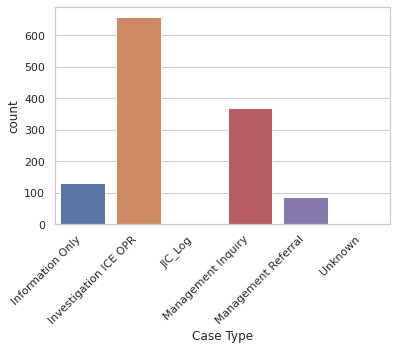

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot('Case Type',data=df1)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
state_counts=df1.groupby(by=['State'])['Case #'].count().reset_index().sort_values(by='Case #', ascending=False)
state_counts

,State,Case #
29,TX,301
2,CA,220
1,AZ,144
4,FL,110
5,GA,81
19,NJ,57
32,WA,48
3,CO,42
26,PA,35
22,NY,22


In [ ]:
list_states= state_counts['State'].head(10).unique()
top_ten_states= df1.loc[df1['State'].apply(lambda x: x in list_states)]

In [ ]:
list_states

array(['TX', 'CA', 'AZ', 'FL', 'GA', 'NJ', 'WA', 'CO', 'PA', 'NY'],
      dtype=object)

In [ ]:
top_ten_states

,Case #,Group,Case Type,Class Code,CaseIs,Status,Incident Date,Reported Date,Detention Facility,Incident City,Incident State,Subject Type,Case Summary,Topic,Synopsis,Primary FD,Secondary FD1,Secondary FD2,State
0,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Information Recorded,Closed,Closed,17-MAR-14,24-MAR-14,PORT ISABEL - TX - SPC,LOS FRESNOS,"CAMERON, TX",ICE Detainee,ERO Allegation of detainee sexual misconduct. ...,Allegation of detainee sexual misconduct.,"On March 20, 2014, the Joint Intake Center (JI...",0604 Detainee/Alien - Consensual Sexual Conduc...,NaN,NaN,TX
1,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Information Recorded,Closed,Closed,17-MAR-14,24-MAR-14,PORT ISABEL - TX - SPC,LOS FRESNOS,"CAMERON, TX",ICE Detainee,ERO Allegation of detainee sexual misconduct. ...,Allegation of detainee sexual misconduct.,"On March 20, 2014, the Joint Intake Center (JI...",0604 Detainee/Alien - Consensual Sexual Conduc...,NaN,NaN,TX
2,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Information Recorded,Closed,Closed,17-MAR-14,24-MAR-14,PORT ISABEL - TX - SPC,LOS FRESNOS,"CAMERON, TX",ICE Detainee,ERO Allegation of detainee sexual misconduct. ...,Allegation of detainee sexual misconduct.,"On March 20, 2014, the Joint Intake Center (JI...",0604 Detainee/Alien - Consensual Sexual Conduc...,NaN,NaN,TX
3,(b)(7)(E),OPR JIC Closed Files,Information Only,Non-Criminal Misconduct,Closed,Closed,01-MAR-14,29-APR-14,ADELANTO CORRECTIONAL FACILITY - CA - IGSA,ADELANTO,"SAN BERNARDINO, CA",ICE Detainee,ERO Allegation of detainee on detainee sexual ...,Allegation of detainee sexual assault.,"On April 29, 2014, the Joint Intake Center (JI...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN,CA
4,(b)(7)(E),ICE Enforcement & Removal Operations,Information Only,Non-Criminal Misconduct,Closed,Closed,06-MAY-14,08-MAY-14,ELOY FEDERAL CONTRACT FACILITY - AZ - IGSA,ELOY,"PINAL, AZ",ICE Detainee (ICE facility),"ERO Detainee alleges sexual harassment. Eloy, AZ",Detainee alleges sexual harassment.,"On May 7, 2014, the Joint Intake Center (JIC) ...",0599 Detainee/Alien - Sexual Harassment (Detai...,NaN,NaN,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,(b)(7)(E),ICE Enforcement & Removal Operations,Management Referral,Non-Criminal (S),Closed,Closed,09-SEP-14,16-SEP-14,NORTHWEST DETENTION CENTER - WA - CDF,TACOMA,"PIERCE, WA",ICE Detainee (ICE facility),ERO Detainee alleged he was sexually assaulted...,ERO Detainee alleged he was sexually assaulted...,"On September 10, 2014, the Joint Intake Center...",0603 Detainee/Alien - Abuse (Sexual Abuse),NaN,NaN,WA
1243,(b)(7)(E),ICE Enforcement & Removal Operations,Management Referral,Non-Criminal Misconduct,Closed,Closed,11-JUL-14,16-SEP-14,ELOY FEDERAL CONTRACT FACILITY - AZ - IGSA,ELOY,"PINAL, AZ",ICE - Contractor,ERO Detainee alleged sexual assault at the Elo...,ERO Detainee alleged sexual assault at the Elo...,"On September 12, 2014, the Joint Intake Center...",0600 Detainee/Alien - Sexual Harassment (Staff...,NaN,NaN,AZ
1244,(b)(7)(E),ICE Enforcement & Removal Operations,Management Referral,Non-Criminal Misconduct,Closed,Closed,18-SEP-14,18-SEP-14,ELOY FEDERAL CONTRACT FACILITY - AZ - IGSA,ELOY,"PINAL, AZ",ICE Detainee,ERO Allegation of detainee/detainee inappropri...,Allegation of detainee sexual assault.,"On September 16, 2014, the Joint Intake Center...",0610 Detainee/Alien - Sexual Assault (Detainee...,NaN,NaN,AZ
1245,(b)(7)(E),ICE Enforcement & Removal Operations,Management Referral,Non-Criminal (S),Closed,Closed,16-SEP-14,18-SEP-14,SOUTH TEXAS DETENTION COMPLEX - TX - CDF,PEARSALL,"FRIO, TX",ICE Contractors and Employees,ERO Staff on Detainee – Inappropriate Touching...,ERO Staff on Detainee – Inappropriate Touching.,"On September 17, 2014, the Joint Intake Center...",0612 Detainee/Alien - Sexual Assault (Staff on...,NaN,NaN,TX


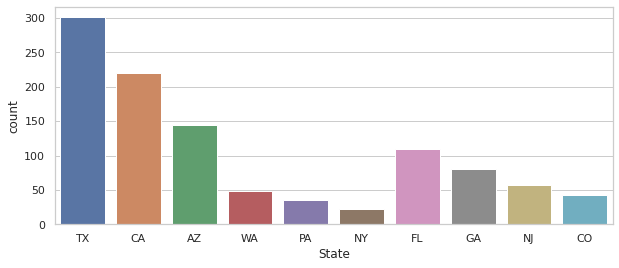

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot('State',data=top_ten_states)
#plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
top_ten_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1246
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Case #              1060 non-null   object
 1   Group               1060 non-null   object
 2   Case Type           1060 non-null   object
 3   Class Code          1058 non-null   object
 4   CaseIs              1060 non-null   object
 5   Status              1060 non-null   object
 6   Incident Date       1060 non-null   object
 7   Reported Date       1060 non-null   object
 8   Detention Facility  1048 non-null   object
 9   Incident City       1060 non-null   object
 10  Incident State      1060 non-null   object
 11  Subject Type        1060 non-null   object
 12  Case Summary        1060 non-null   object
 13  Topic               1058 non-null   object
 14  Synopsis            1058 non-null   object
 15  Primary FD          1060 non-null   object
 16  Secondary FD1       32 n

In [ ]:
top_ten_states['Incident Date'] = pd.to_datetime(top_ten_states['Incident Date'])

In [ ]:
top_ten_states['Reported Date']=pd.to_datetime(top_ten_states['Reported Date'])

In [ ]:
top_ten_states['i_year']=top_ten_states['Incident Date'].dt.year

In [ ]:
top_ten_states['month_year'] = pd.to_datetime(top_ten_states['Incident Date']).dt.to_period('M')

In [ ]:
top_ten_states['i_month'] = pd.to_datetime(top_ten_states['Incident Date']).dt.month

In [ ]:
top_ten_states['i_day'] = pd.to_datetime(top_ten_states['Incident Date']).dt.weekday
#The day of the week with Monday=0, Sunday=6.

In [ ]:
top_ten_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1246
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Case #              1060 non-null   object        
 1   Group               1060 non-null   object        
 2   Case Type           1060 non-null   object        
 3   Class Code          1058 non-null   object        
 4   CaseIs              1060 non-null   object        
 5   Status              1060 non-null   object        
 6   Incident Date       1060 non-null   datetime64[ns]
 7   Reported Date       1060 non-null   datetime64[ns]
 8   Detention Facility  1048 non-null   object        
 9   Incident City       1060 non-null   object        
 10  Incident State      1060 non-null   object        
 11  Subject Type        1060 non-null   object        
 12  Case Summary        1060 non-null   object        
 13  Topic               1058 non-null   object      

In [ ]:
state_cross=pd.crosstab(top_ten_states["State"], top_ten_states["i_year"])
state_cross.style.background_gradient(cmap='Blues', axis=1)

i_year,2014,2015,2016,2017,2018
State,,,,,
AZ,45,38,40,16,5
CA,46,56,58,55,5
CO,5,7,14,15,1
FL,18,18,32,41,1
GA,15,16,27,17,6
NJ,13,13,23,7,1
NY,4,9,2,4,3
PA,6,9,10,10,0
TX,42,90,95,67,7


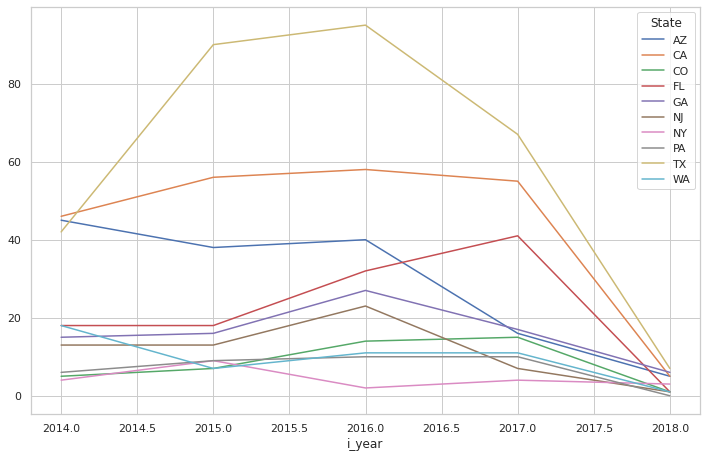

In [ ]:
state_cross.T.plot(figsize = (12, 7.5)) #note that 2018 is only the month of January to April.

In [ ]:
center_cross=pd.crosstab(top_ten_states["Detention Facility"], top_ten_states["i_year"])
center_cross.style.background_gradient(cmap='Blues', axis=1)

i_year,2014,2015,2016,2017,2018
Detention Facility,,,,,
ADELANTO CORRECTIONAL FACILITY - CA - IGSA,21,15,17,22,3
ATLANTA CITY DETENTION CENTER - GA - IGSA,0,0,3,3,1
AURORA CITY JAIL - CO - IGSA,0,0,1,4,0
BAKER COUNTY SHERIFF DEPARTMENT - FL - IGSA,1,3,8,4,0
BAKERFIELD HOLD - CA - OTHER,0,1,0,0,0
BERGEN COUNTY JAIL - NJ - IGSA,0,0,3,1,0
BERKS FAMILY RESIDENTIAL CENTER - PA - FRC,0,1,0,0,0
BROWARD TRANSITIONAL CENTER - FL - CDF,8,4,2,3,0
BUFFALO (BATAVIA) SERVICE PROCESSING CENTER - NY - SPC,2,5,0,3,2


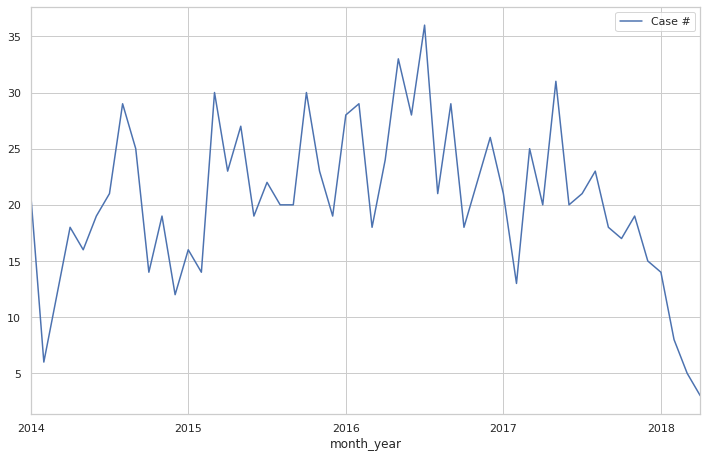

In [ ]:
top_ten_states.groupby('month_year').count()[['Case #']].plot(figsize = (12, 7.5))

In [ ]:
state_cross=pd.crosstab(top_ten_states["State"], top_ten_states["i_month"])
state_cross.style.background_gradient(cmap='Blues', axis=1)

i_month,1,2,3,4,5,6,7,8,9,10,11,12
State,,,,,,,,,,,,
AZ,13,8,14,13,9,9,18,11,15,11,12,11
CA,22,10,17,13,26,19,22,27,22,18,12,12
CO,2,3,4,6,5,7,0,2,3,2,3,5
FL,10,7,2,11,21,14,7,11,6,1,12,8
GA,9,2,9,8,7,7,9,5,6,8,5,6
NJ,4,5,6,5,9,3,2,7,6,2,5,3
NY,2,4,1,2,2,2,0,1,1,4,2,1
PA,2,5,3,2,4,4,4,1,1,2,5,2
TX,32,25,31,25,20,16,31,23,28,27,24,19


It would be important to know how many people was held on the different locations to see the proportion of events relative to the number of people held.

In [ ]:
fd_month_cross = pd.crosstab(top_ten_states['Primary FD'], top_ten_states['i_month']) 
#The day of the week with Monday=0, Sunday=6.
fd_month_cross.style.background_gradient(cmap='Blues', axis=1)


i_month,1,2,3,4,5,6,7,8,9,10,11,12
Primary FD,,,,,,,,,,,,
0201 Smuggling-Drugs,0,0,0,0,0,0,0,0,1,0,0,0
0599 Detainee/Alien - Sexual Harassment (Detainee-on-Detainee),16,13,8,12,18,15,9,12,11,8,14,14
0600 Detainee/Alien - Sexual Harassment (Staff-on-Detainee),7,6,5,9,10,8,9,8,7,7,5,4
0603 Detainee/Alien - Abuse (Sexual Abuse),4,2,0,5,6,2,2,3,4,2,3,1
0604 Detainee/Alien - Consensual Sexual Conduct (Detainee-on-Detainee),1,0,3,1,3,0,1,1,0,2,1,0
0606 Detainee/Alien - Abuse (Other),0,0,0,1,0,0,0,0,0,1,0,0
0607 Detainee/Alien - Physical Assault (Detainee on Detainee),1,0,0,1,1,0,0,0,0,1,0,1
0610 Detainee/Alien - Sexual Assault (Detainee on Detainee),62,36,62,45,55,43,61,51,59,42,43,38
0612 Detainee/Alien - Sexual Assault (Staff on Detainee),9,11,12,12,14,15,16,15,10,14,16,13


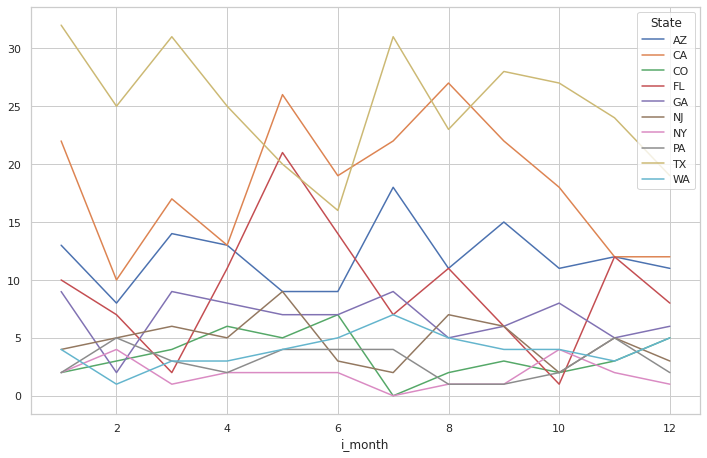

In [ ]:
state_cross.T.plot(figsize = (12, 7.5))

In [ ]:
type_cross = pd.crosstab(top_ten_states['Primary FD'], top_ten_states['i_day']) #The day of the week with Monday=0, Sunday=6.
type_cross.style.background_gradient(cmap='Blues', axis=1)

i_day,0,1,2,3,4,5,6
Primary FD,,,,,,,
0201 Smuggling-Drugs,1,0,0,0,0,0,0
0599 Detainee/Alien - Sexual Harassment (Detainee-on-Detainee),18,30,26,29,26,5,16
0600 Detainee/Alien - Sexual Harassment (Staff-on-Detainee),12,16,8,20,13,4,12
0603 Detainee/Alien - Abuse (Sexual Abuse),5,5,5,5,7,4,3
0604 Detainee/Alien - Consensual Sexual Conduct (Detainee-on-Detainee),3,0,2,3,4,1,0
0606 Detainee/Alien - Abuse (Other),0,0,2,0,0,0,0
0607 Detainee/Alien - Physical Assault (Detainee on Detainee),0,1,2,1,1,0,0
0610 Detainee/Alien - Sexual Assault (Detainee on Detainee),90,103,86,110,79,65,64
0612 Detainee/Alien - Sexual Assault (Staff on Detainee),21,31,26,32,29,9,9


In [ ]:
top_ten_states['reporting_delay'] = (top_ten_states['Reported Date'] - top_ten_states['Incident Date'])

In [ ]:
top_ten_states['reporting_delay'] =top_ten_states['reporting_delay'].apply(lambda x: x.days)
top_ten_states['delay']=top_ten_states['reporting_delay'].astype(int)
top_ten_states['delay']

0        7
1        7
2        7
3       59
4        2
        ..
1242     7
1243    67
1244     0
1245     2
1246     0
Name: delay, Length: 1060, dtype: int64

In [ ]:
top_ten_states.groupby(by='Primary FD')['delay'].describe()

,count,mean,std,min,25%,50%,75%,max
Primary FD,,,,,,,,
0201 Smuggling-Drugs,1.0,29.000000,NaN,29.0,29.00,29.0,29.00,29.0
0599 Detainee/Alien - Sexual Harassment (Detainee-on-Detainee),150.0,6.766667,22.346694,-15.0,0.00,1.0,3.00,182.0
0600 Detainee/Alien - Sexual Harassment (Staff-on-Detainee),85.0,17.552941,53.051077,-1.0,0.00,3.0,14.00,409.0
0603 Detainee/Alien - Abuse (Sexual Abuse),34.0,6.029412,11.347100,-1.0,0.25,2.0,5.75,51.0
0604 Detainee/Alien - Consensual Sexual Conduct (Detainee-on-Detainee),13.0,4.461538,5.394679,0.0,0.00,1.0,7.00,17.0
0606 Detainee/Alien - Abuse (Other),2.0,15.500000,4.949747,12.0,13.75,15.5,17.25,19.0
0607 Detainee/Alien - Physical Assault (Detainee on Detainee),5.0,10.200000,8.197561,0.0,6.00,8.0,17.00,20.0
0610 Detainee/Alien - Sexual Assault (Detainee on Detainee),597.0,6.922948,40.773158,-366.0,0.00,1.0,4.00,812.0
0612 Detainee/Alien - Sexual Assault (Staff on Detainee),157.0,20.955414,96.242638,0.0,0.00,1.0,7.00,882.0


The count of days the report was delayed, needs some outlier cleanup as well as to understand some negative values could have been data entry error were dates of incident and report are interchanged.